## PS6 

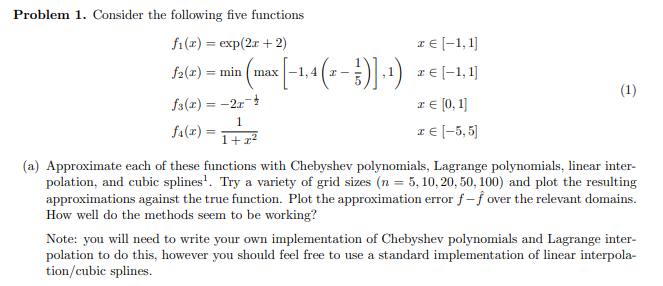

In [20]:
import numpy as np
from numpy.polynomial import chebyshev

In [7]:
#first we define all of the functions 

def f1(x): 
    return np.exp(2*x + 2)

def f2(x):
    return min(max(-1, 4 * (x - 1/5)), 1)

def f3(x):
    return -2*x**(-1/2)

def f4(x):
    return 1/(1+x**2) 

#chebyshev 
def chebyshev_nodes(n, a, b):
    '''generate Chebyshev nodes, the points where the Chebyshev polynomials are evaluated.'''
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * np.arange(n + 1, dtype=float) / n)

def chebyshev_approximation(n, a, b, f):
    nodes = chebyshev_nodes(n, a, b)
    values = f(nodes)
    return np.polyfit(nodes, values, n)

def f(x):
    return np.sin(x)

grid_sizes = [5, 10, 20, 50, 100]
a, b = 0, np.pi

for n in grid_sizes:
    coefficients = chebyshev_approximation(n, a, b, f)
    approx = np.poly1d(coefficients)
    x = np.linspace(a, b, 1000)
    y = f(x)
    y_approx = approx(x)
    error = np.abs(y - y_approx).max()
    print(f"Grid size: {n}, Maximum error: {error:.4e}")

Grid size: 5, Maximum error: 1.2069e-03
Grid size: 10, Maximum error: 4.3867e-10
Grid size: 20, Maximum error: 4.4721e-15
Grid size: 50, Maximum error: 2.2775e-14
Grid size: 100, Maximum error: 2.9102e-14


C:\Users\s1941920\AppData\Local\Temp\ipykernel_8200\3445270979.py:32: RankWarning: Polyfit may be poorly conditioned
  coefficients = chebyshev_approximation(n, a, b, f)
C:\Users\s1941920\AppData\Local\Temp\ipykernel_8200\3445270979.py:32: RankWarning: Polyfit may be poorly conditioned
  coefficients = chebyshev_approximation(n, a, b, f)
C:\Users\s1941920\AppData\Local\Temp\ipykernel_8200\3445270979.py:32: RankWarning: Polyfit may be poorly conditioned
  coefficients = chebyshev_approximation(n, a, b, f)


Grid size: 5, Maximum error: 4.6554e-02
Grid size: 10, Maximum error: 8.1051e-07
Grid size: 20, Maximum error: 2.4158e-13
Grid size: 50, Maximum error: 1.1129e-12
Grid size: 100, Maximum error: 9.8765e-13


C:\Users\s1941920\AppData\Local\Temp\ipykernel_8200\3135919252.py:21: RankWarning: Polyfit may be poorly conditioned
  coefficients = chebyshev_approximation(n, a, b, f1)
C:\Users\s1941920\AppData\Local\Temp\ipykernel_8200\3135919252.py:21: RankWarning: Polyfit may be poorly conditioned
  coefficients = chebyshev_approximation(n, a, b, f1)


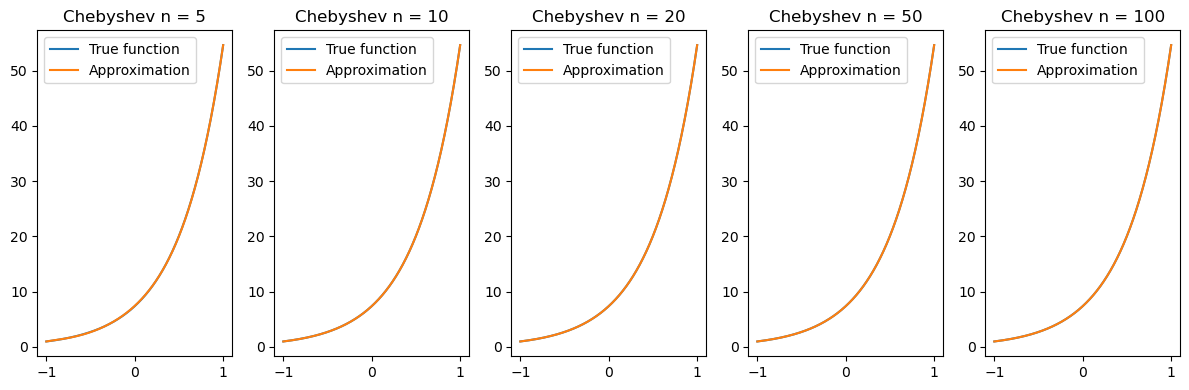

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def chebyshev_nodes(n, a, b):
    '''The function returns an array of n + 1 nodes '''
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * np.arange(n + 1, dtype=float) / n)

def chebyshev_approximation(n, a, b, f):
    '''calculates the Chebyshev polynomial approximation of a given function f on the interval [a, b] 
    using the Chebyshev nodes and the values of the function f at the nodes. The function returns 
    the coefficients of the Chebyshev polynomial approximation, which are calculated using the np.polyfit '''
    nodes = chebyshev_nodes(n, a, b)
    values = f(nodes) #function evaluated at the nodes 
    return np.polyfit(nodes, values, n)

def f1(x):
    return np.exp(2 * x + 2)

grid_sizes = [5, 10, 20, 50, 100]
a, b = -1, 1

fig, axs = plt.subplots(1, len(grid_sizes), figsize=(12, 4))

for i, n in enumerate(grid_sizes):
    coefficients = chebyshev_approximation(n, a, b, f1)
    approx = np.poly1d(coefficients)
    x = np.linspace(a, b, 1000)
    y = f1(x)
    y_approx = approx(x)
    error = np.abs(y - y_approx).max()
    print(f"Grid size: {n}, Maximum error: {error:.4e}")

    axs[i].plot(x, y, label='True function')
    axs[i].plot(x, y_approx, label='Approximation')
    axs[i].set_title(f"Chebyshev n = {n}")
    axs[i].legend()

plt.tight_layout()
plt.show()


The expression np.arange(n + 1, dtype=float) creates an array of n + 1 values, starting from 0 and ending at n. This array is then scaled by dividing it by n and multiplying it by π to give the angles in radians for each node. The expression np.cos(np.pi * np.arange(n + 1, dtype=float) / n) 


The chebyshev.chebfit function fits a Chebyshev series of a given degree to the data points (nodes, fvals). The degree of the Chebyshev series is specified by the argument n, which should be the same as the number of nodes n. The function returns an array of coefficients, starting with the coefficient of the highest degree term and ending with the constant term.

The approximation error over the relevant domain is the difference between the true function and its approximation. In this case, it is defined as f - f_approx. This represents how close the approximation is to the true function over the relevant domain. A small approximation error means that the approximation is a good fit to the true function over the relevant domain.

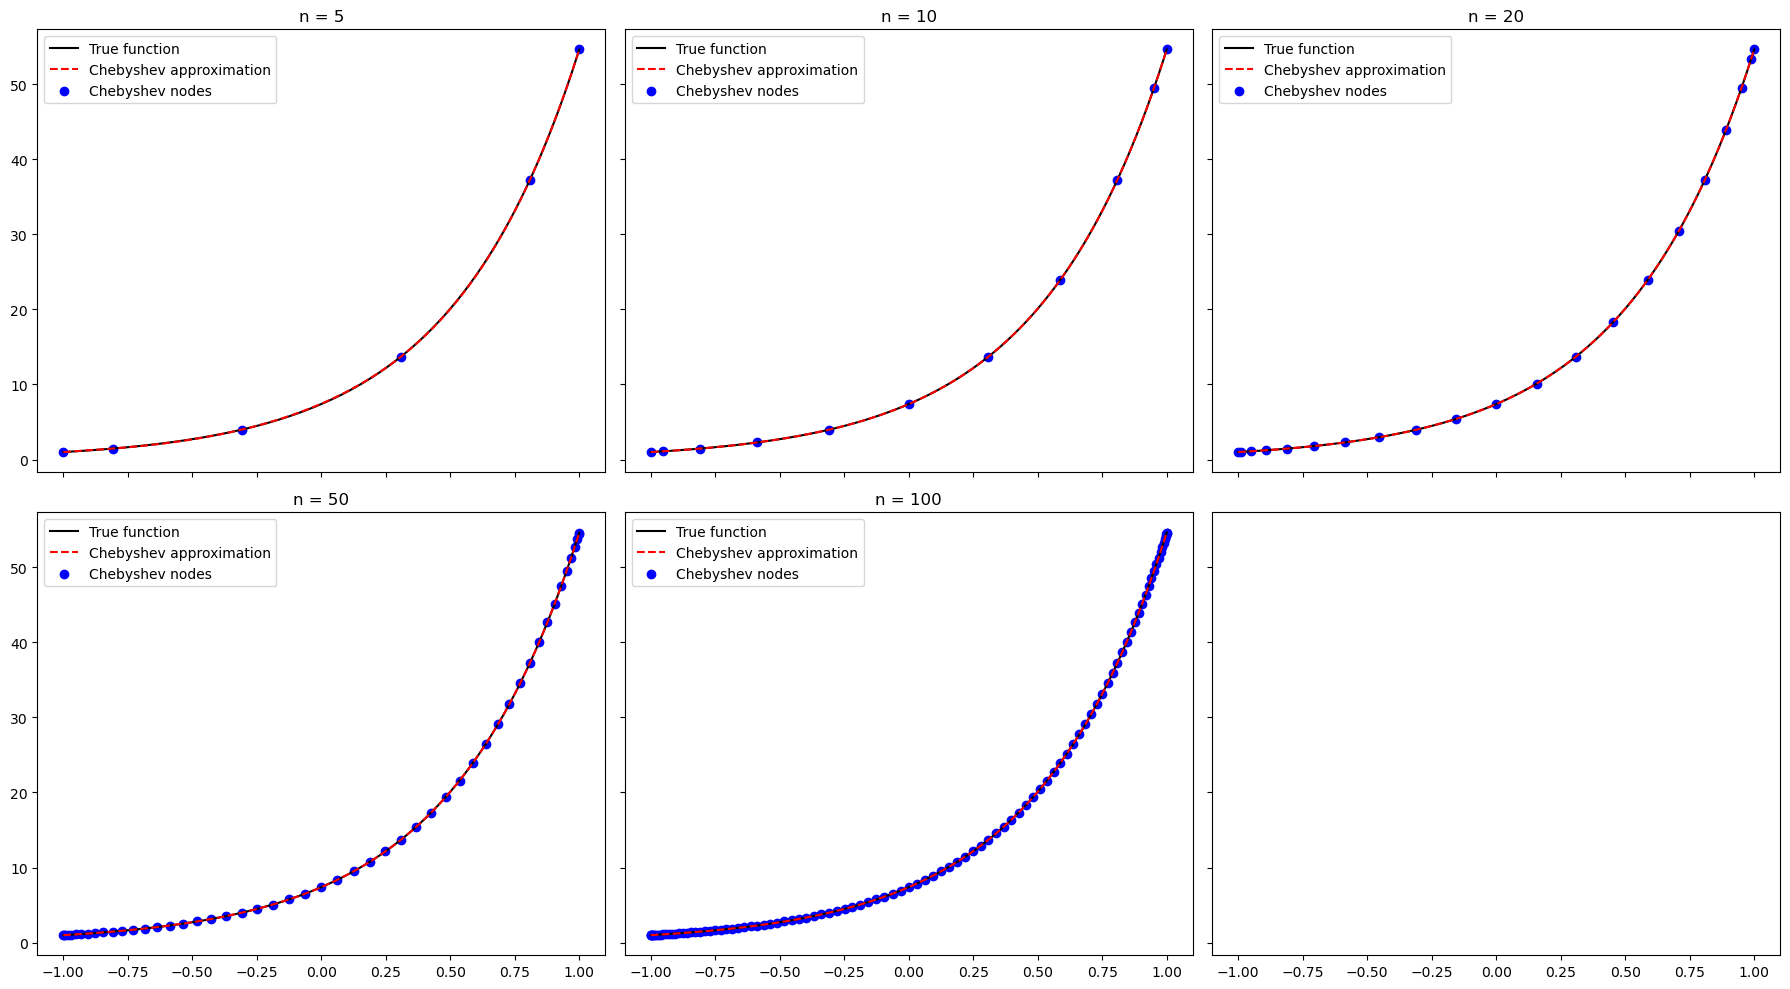

In [22]:

def f1(x): 
    return np.exp(2*x + 2)
#let's try explicitly following the algorithm from the class : Chebyshev regression approximation algorithm 

#first define the nodes:
def chebyshev_nodes(n, a, b): #where a and b are the bounds 
    '''The function returns an array of n + 1 nodes '''
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * np.arange(n + 1, dtype=float) / n)

#evaluate using function f, try n = 5 first 
n = 5
nodes = chebyshev_nodes(n,-1, 1)
fvals = f1(nodes)

#then we compute the chebyshev coefficients:
coefficients = chebyshev.chebfit(nodes,fvals, n  )

#constructing the approximation i.e subs our coefficients into eqns (7) in the slides 
x = np.linspace(-1, 1, 1000)
y_approx = chebyshev.chebval(x, coefficients)


n_values = [5, 10, 20, 50, 100]
a, b = -1, 1
x = np.linspace(a, b, 1000)
y = f1(x)

fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
ax = ax.ravel()

for i, n in enumerate(n_values):
    nodes = chebyshev_nodes(n, a, b)
    fvals = f1(nodes)
    coefficients = chebyshev.chebfit(nodes, fvals, n)
    y_approx = chebyshev.chebval(x, coefficients)
    
    ax[i].plot(x, y, 'k', label='True function')
    ax[i].plot(x, y_approx, 'r--', label='Chebyshev approximation')
    ax[i].scatter(nodes, fvals, color='blue', label='Chebyshev nodes')
    ax[i].legend()
    ax[i].set_title(f'n = {n}')
    
plt.tight_layout()
plt.show()




In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
ax = ax.ravel()


for i, n in enumerate(n_values):
    nodes = chebyshev_nodes(n, a, b)
    fvals = f1(nodes)
    coefficients = chebyshev.chebfit(nodes, fvals, n)
    y_approx = chebyshev.chebval(x, coefficients)
    
    ax[i].plot(x, y, 'k', label='True function')
    ax[i].plot(x, y_approx, 'r--', label='Chebyshev approximation')
    ax[i].scatter(nodes, fvals, color='blue', label='Chebyshev nodes')
    ax[i].legend()
    ax[i].set_title(f'n = {n}')
    
plt.tight_layout()
plt.show()


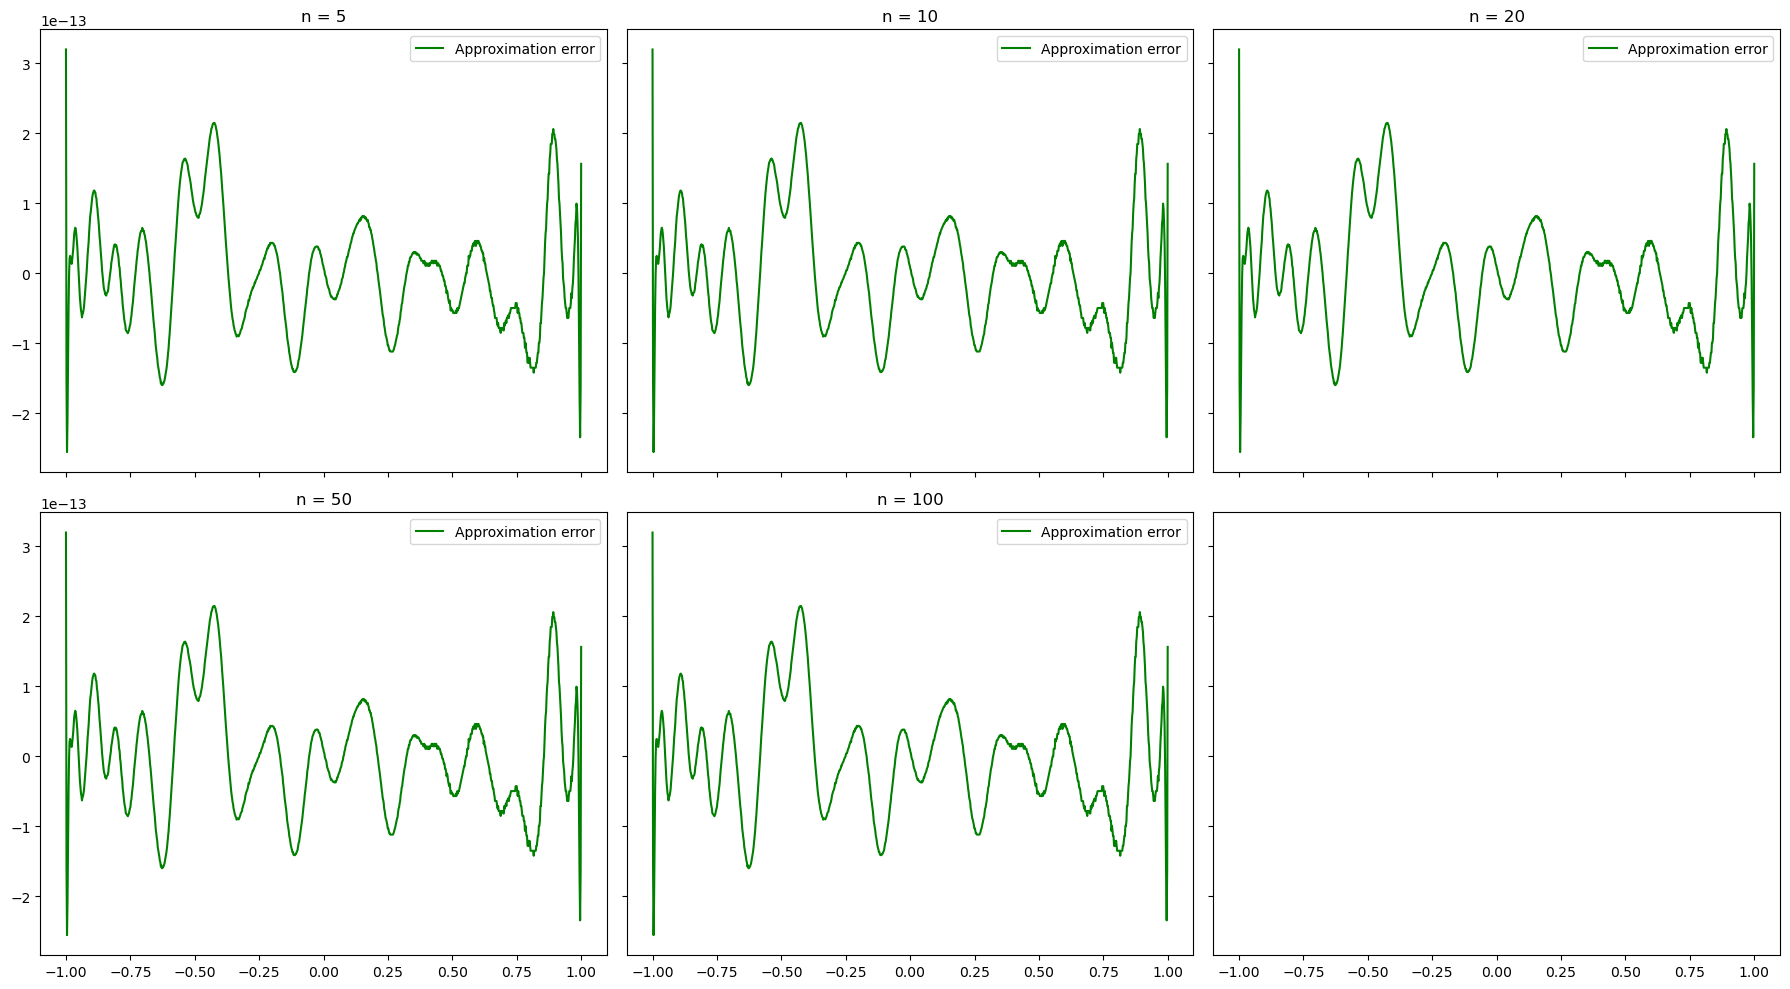

In [27]:
error = y - y_approx

fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
ax = ax.ravel()

for i, n in enumerate(n_values):
    ax[i].plot(x, error, 'g', label='Approximation error')
    ax[i].legend()
    ax[i].set_title(f'n = {n}')
    error = np.abs(y - y_approx).max()
    
plt.tight_layout()
plt.show()
#the errors are relatively small even if they do fluctuate. Thus maximum error might be a better to illustrate the error 

